### Model explainable

Try to use **dtreeviz** to explain why model makes decisions with trees, with support both `sklearn` and `xgboost`.

First step should install **dtreeviz** and [Graphviz](https://graphviz.gitlab.io/_pages/Download/Download_windows.html). For installment is [easy](https://graphviz.org/download/).

In [73]:
from dtreeviz.trees import *
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import xgboost

iris = load_iris()

x, y = iris.data, iris.target


feature_names = iris.feature_names
target_names = iris.target_names.tolist()

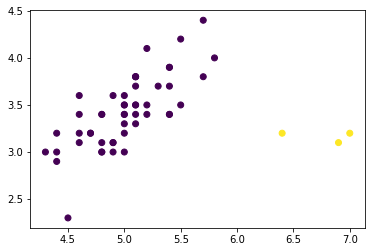

In [72]:
y_new = y[:53]
x_new = x[:53, :2]

import matplotlib.pyplot as plt
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_new)

In [45]:
# model training
dtc = DecisionTreeClassifier()

dtc.fit(x, y)

DecisionTreeClassifier()

##### Decision Tree viz

In [46]:
# start to use viz
viz = dtreeviz(dtc, x, y, class_names=target_names, feature_names=feature_names)

# There will be a svg file stored in local server, we could just open it.
viz.view()

##### Decision Path

In [74]:
test_data = x[1]

viz = dtreeviz(dtc, x, y, class_names=target_names, feature_names=feature_names, X=test_data)
viz.view()

In [48]:
test_data

array([4.9, 3. , 1.4, 0.2])

In [52]:
dtc.predict(test_data.reshape(1, -1))

array([0])

In [53]:
target_names

['setosa', 'versicolor', 'virginica']

##### With just decision path


In [65]:
viz = dtreeviz(dtc, x, y, class_names=target_names, feature_names=feature_names, X=test_data, show_just_path=True)
viz.view()

In [66]:
# view as plain words

print(explain_prediction_path(dtc, test_data, feature_names=feature_names, class_names=target_names, explanation_type='plain_english'))

petal width (cm) < 0.8



AxesSubplot(0.125,0.125;0.775x0.755)


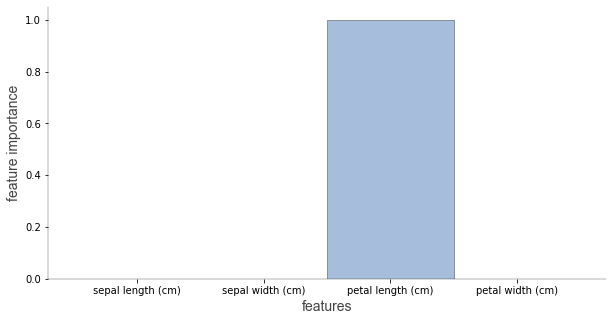

In [7]:
# view as feature importance

print(explain_prediction_path(dtc, test_data, feature_names=feature_names, class_names=target_names, explanation_type='sklearn_default'))

In [67]:
# view without histgrams
viz = dtreeviz(dtc, x, y, class_names=target_names, feature_names=feature_names, fancy=False)

# There will be a svg file stored in local server, we could just open it.
viz.view()

### Try with Regression

In [10]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
x, y = boston.data, boston.target
feature_names = boston.feature_names
target_names = 'Boston_data'

In [12]:
dtr = DecisionTreeRegressor(max_depth=2)

dtr.fit(x, y)

DecisionTreeRegressor(max_depth=2)

In [15]:
viz = dtreeviz(dtr, x, y, target_name=target_names, feature_names=feature_names)
viz.view()

In [17]:
print("data shape: ", x.shape)
print("data feature_names: ", feature_names)

data shape:  (506, 13)
data feature_names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


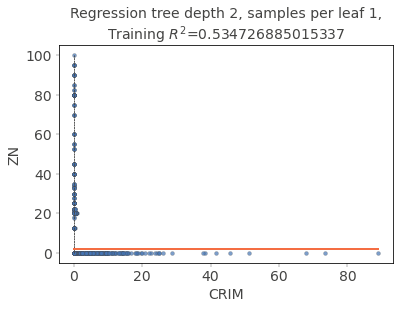

In [22]:
# plot one feature with target
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

x_val = x[:, 0].reshape(-1, 1)
y_val = x[:, 1].reshape(-1, 1)
x_name = feature_names[0]
y_name = feature_names[1]

dtr.fit(x_val, y_val)

rtreeviz_univar(dtr, x_val, y_val, x_name, y_name, ax=ax)
plt.show()

In [54]:
# test with xgboost

from xgboost import XGBClassifier

xgbc = XGBClassifier()

x, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names.tolist()

xgbc.fit(x, y)

[13:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Public\Anaconda3\envs\automl\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
viz = dtreeviz(xgbc, x, y, tree_index=1, feature_names=feature_names, class_names=target_names)
# path = r"C:\Users\guangqiang.lu\Documents\lugq\github_code\daily_work_code\PycharmProjects\leet_code\hands_on_test\test.svg"
# viz.save(path)

viz.view()

In [62]:
test_size = 3

for i in range(test_size):
    test_data = x[i,:]

    viz = dtreeviz(xgbc, x, y, tree_index=0, class_names=target_names, feature_names=feature_names, X=test_data, show_just_path=True)
    viz.view()

In [64]:
xgbc.predict_proba(test_data.reshape(1, -1))

array([[9.9680281e-01, 2.3831066e-03, 8.1413286e-04]], dtype=float32)

## Combine with PowerBI

Create a dataset that contain a index with data and output each dataset prediction path with a file, but here need a functionality to convert `SVG` file into `PNG` file, also need a function to convert file into POWERBI URL file type.

Let's do it.

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os
import pandas as pd
from dtreeviz.trees import dtreeviz
import cairosvg

iris = load_iris()

x, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names.tolist()

dtc = DecisionTreeClassifier()

dtc.fit(x, y)

# save training data into a file
data = np.concatenate([x, y.reshape(-1, 1)], axis=1)
df = pd.DataFrame(data, columns=list('abcd') + ['label'])

path = r"C:\Users\guangqiang.lu\Downloads\powerbi_with_model_explain"
df = df.reset_index()

df.to_csv(os.path.join(path, 'training.csv'), index=False)



In [13]:
# explain with each dataset
svg_path = os.path.join(path, "test_data_explain")

for i, test_data in enumerate(x):
    viz = dtreeviz(dtc, x, y, tree_index=0, class_names=target_names, feature_names=feature_names, X=test_data, show_just_path=True)
    file_path = os.path.join(svg_path, 'res_{}.svg'.format(str(i)))
    png_file_path = os.path.join(svg_path, 'res_{}.png'.format(str(i)))
    viz.save(file_path)
    
    # convert svg into png
    cairosvg.svg2png(url=file_path, write_to=png_file_path)
    

# remove other files
files_to_remove = [x for x in os.listdir(svg_path) if not x.endswith('png')]
print([os.remove(os.path.join(svg_path, x)) for x in files_to_remove])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,